In [14]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

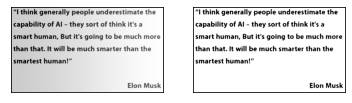

In [15]:
img = cv.imread('files/noisey_OCR.jpg',0)
img0 = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img0,127,255,cv.THRESH_BINARY)

images = [img0, th1]
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.xticks([]),plt.yticks([])
plt.show()

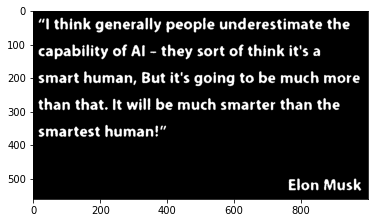

In [16]:
th2 = 255 - th1
kernel = np.array([[0,1,0],[1,1,1],[0,1,0]],np.uint8)
th3 = cv.morphologyEx(th2, cv.MORPH_OPEN, kernel)
plt.imshow(th3, cmap='gray')

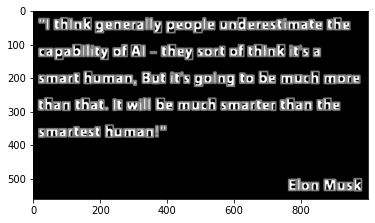

In [17]:
img_2= th3.copy()

kernel = np.ones((3,3),np.uint8)

contours_2, hierarchy = cv.findContours(img_2, cv.cv2.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# RETR_CCOMP   cv2.RETR_EXTERNAL

alphabets = []
for c in contours_2:
    if len(c)>5:
        x, y, w, h = cv.boundingRect(c)
        cv.rectangle(img_2, (x, y), (x+w, y+h), (127,127,127), 4)
        alphabets.append(255 - th1[y:y+h, x:x+w])
plt.imshow(img_2, cmap='gray')

In [18]:
len(alphabets)

174

In [19]:
if not os.path.exists('alphabets_noise'):
    os.makedirs('alphabets_noise')
path = os.path.join(os.getcwd(), 'alphabets_noise')

kernel = np.array([[0,1,0],[1,1,1],[0,1,0]],np.uint8)
for i in range(len(alphabets)):
    if len(alphabets[i])>10 and np.sum(alphabets[i])>10:
        alphabets[i] = cv.erode(alphabets[i],kernel,iterations = 1)
        cv.imwrite(os.path.join(path, f'{i}.jpg'), alphabets[i])